# **Model Klasifikasi Menggunakan Deep Neural Network dengan Keras**

# **Example 1**

In [ ]:
# Import required packages
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# Make predictions using the trained model on the test data
#predictions = model.predict(test_data)

In [ ]:
# Set seed for reproducibility
np.random.seed(2018)
print(np)

<module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'>


In [ ]:
# Generate dummy training data for 1000 students and test data for 500 students
# Columns: Age, Hours of Study, and Avg Previous Test Scores
train_data = np.random.random((1000, 3))
test_data = np.random.random((500, 3))
test_data

array([[0.35981783, 0.64707122, 0.16858627],
       [0.95089881, 0.24401454, 0.39478811],
       [0.99185888, 0.01995682, 0.19105642],
       ...,
       [0.03335012, 0.35559007, 0.5386409 ],
       [0.3804594 , 0.11970055, 0.08783101],
       [0.83887832, 0.26936355, 0.90847875]])

In [ ]:
# Generate dummy labels for 1000 students: Passed (1) or Failed (0)
labels = np.random.randint(2, size=(1000, 1))

In [ ]:
# Define the model structure
model = Sequential()
model.add(Dense(5, input_dim=3, activation='relu'))  # First layer with 5 neurons
model.add(Dense(4, activation='relu'))               # Second layer with 4 neurons
model.add(Dense(1, activation='sigmoid'))            # Output layer for binary classification

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_data, labels, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4902 - loss: 0.7099
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4977 - loss: 0.6990 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4808 - loss: 0.6982 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6948 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4932 - loss: 0.6960 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5127 - loss: 0.6937 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5408 - loss: 0.6921 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4968 - loss: 0.6941 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4818 - loss: 0.6951 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4827 - loss: 0.6943 


In [ ]:
# Make predictions using the trained model on the test data
predictions = model.predict(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


# **Example 2**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv("train.csv")

# Data preprocessing
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)  # Drop irrelevant columns
df['Sex'] = df['Sex'].map({"male": 1, "female": 0})  # Encode 'Sex'
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing 'Embarked' values
df['Embarked'] = df['Embarked'].map({"S": 0, "C": 1, "Q": 2})  # Encode 'Embarked'

# Fill missing 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop rows with missing 'Fare' values
df.dropna(subset=['Fare'], inplace=True)

# Features and labels
X = df.drop(columns=['Pclass'])  # Features
y = to_categorical(df['Pclass'] - 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-34-d48606583157>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing 'Embarked' values
<ipython-input-34-d48606583157>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [ ]:
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
X.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,1,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,0,1,35.0,0,0,8.0500,0


In [ ]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),  # Input layer
    keras.layers.Dense(32, activation='relu')
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.3488 - loss: 1.1098 - val_accuracy: 0.4685 - val_loss: 1.0363
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5378 - loss: 0.9876 - val_accuracy: 0.5664 - val_loss: 0.9389
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6295 - loss: 0.8682 - val_accuracy: 0.6573 - val_loss: 0.8700
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.8263 - val_accuracy: 0.6923 - val_loss: 0.8206
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6699 - loss: 0.7835 - val_accuracy: 0.7133 - val_loss: 0.7833
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6830 - loss: 0.7580 - val_accuracy: 0.7273 - val_loss: 0.7558
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7288 - loss: 0.7044 - val_accuracy: 0.7343 - val_loss: 0.7333
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7125 - loss: 0.7122 - val_accuracy: 0.7413 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8513 - loss: 0.4649
Test Accuracy: 0.8492


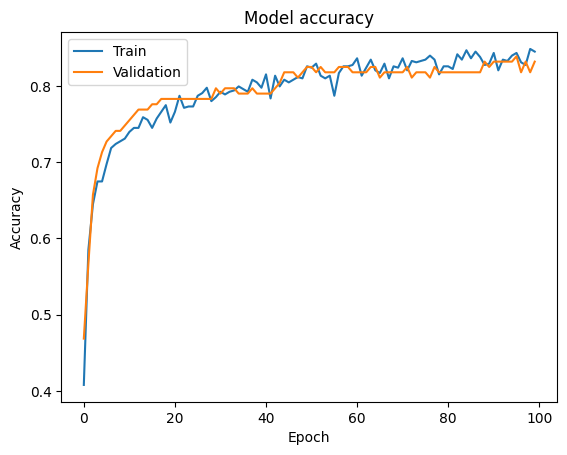

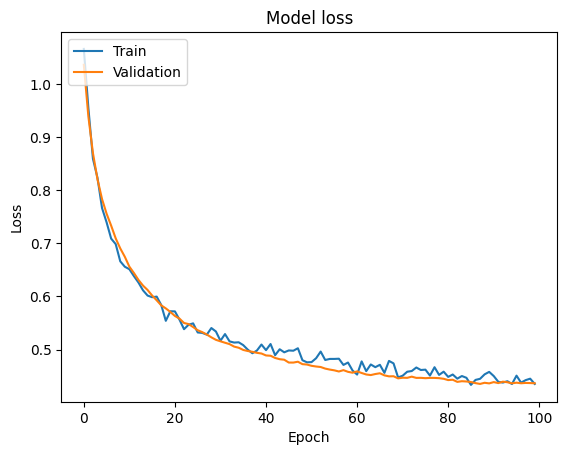

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()